# Grouped Mutation

We can use the variables within a dataframe to group together observation and operate on groups.

The function we will use are `group_by`, to define the group, `mutate()`, to create new variable (we have already seen this one!), and `summarise()`, to reduce a dataframe compressing each group into one row.

In [3]:
library(tidyverse)
library(singer)
library(skimr)


Attaching package: ‘skimr’

The following object is masked from ‘package:stats’:

    filter



Consider the usual `singer_locations` example (and let's get rid of the zero years). One of the variable is `year`. We can use it to group the dataframe.

In [4]:
sl <- singer_locations %>%
  filter(year != 0)

sl %>%
  group_by(year) %>%
  head()

track_id,title,song_id,release,artist_id,artist_name,year,duration,artist_hotttnesss,artist_familiarity,latitude,longitude,name,city
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
TRWICRA128F42368DB,The Conversation (Cd),SOSURTI12A81C22FB8,Even If It Kills Me,ARACDPV1187FB58DF4,Motion City Soundtrack,2007,170.4485,0.6410183,0.8230522,NA,NA,NA,NA
TRXJANY128F42246FC,Lonely Island,SODESQP12A6D4F98EF,The Duke Of Earl,ARYBUAO1187FB3F4EB,Gene Chandler,2004,106.5530,0.3937627,0.5700167,41.88415,-87.63241,Gene Chandler,"Chicago, IL"
TRIKPCA128F424A553,Here's That Rainy Day,SOQUYQD12A8C131619,Imprompture,AR4111G1187B9B58AB,Paul Horn,1998,527.5947,0.4306226,0.5039940,40.71455,-74.00712,Paul Horn,"New York, NY"
TRYEATD128F92F87C9,Rego Park Blues,SOEZGRC12AB017F1AC,Still River,ARQDZP31187B98D623,Ronnie Earl & the Broadcasters,1995,695.1179,0.3622792,0.4773099,NA,NA,NA,NA
TRBYYXH128F4264585,Games,SOPIOCP12A8C13A322,Afro-Harping,AR75GYU1187B9AE47A,Dorothy Ashby,1968,237.3220,0.4107520,0.5303468,42.33168,-83.04792,Dorothy Ashby,"Detroit, MI"
TRKFFKR128F9303AE3,More Pipes,SOHQSPY12AB0181325,Six Yanks,ARCENE01187B9AF929,Barleyjuice,2006,192.9400,0.3762635,0.5412950,40.99471,-77.60454,Barleyjuice,Pennsylvania


Wait, this is **exactly** the same output we get when we don't group. Well, yes. The grouping is almost invisible. We can notice it if we look at the `class()` of the dataframe

In [5]:
sl %>% class()
sl %>% group_by(year) %>% class()

[1] "tbl_df"     "tbl"        "data.frame"

[1] "grouped_df" "tbl_df"     "tbl"        "data.frame"

Yet, the grouping makes a lot of difference when we operate on the dataframe!  
Let's use the function `summarise()` to see it.

In [6]:
sl %>%
  summarise(median_hotttnesss = median(artist_hotttnesss))

median_hotttnesss
<dbl>
0.4103622


The function `summarise()` took the full column of `artist_hotttnesss` and computed the mean. One column, on value. However, if we group:

In [7]:
sl %>%
  group_by(year) %>%
  summarise(median_hotttnesss = median(artist_hotttnesss)) %>%
  head()

year,median_hotttnesss
<int>,<dbl>
1922,0.3496206
1926,0.3828469
1927,0.3828469
1929,0.3507879
1937,0.3530357
1940,0.3568980


Now we have one median for each year! Neat! We can use it to do some plotting:

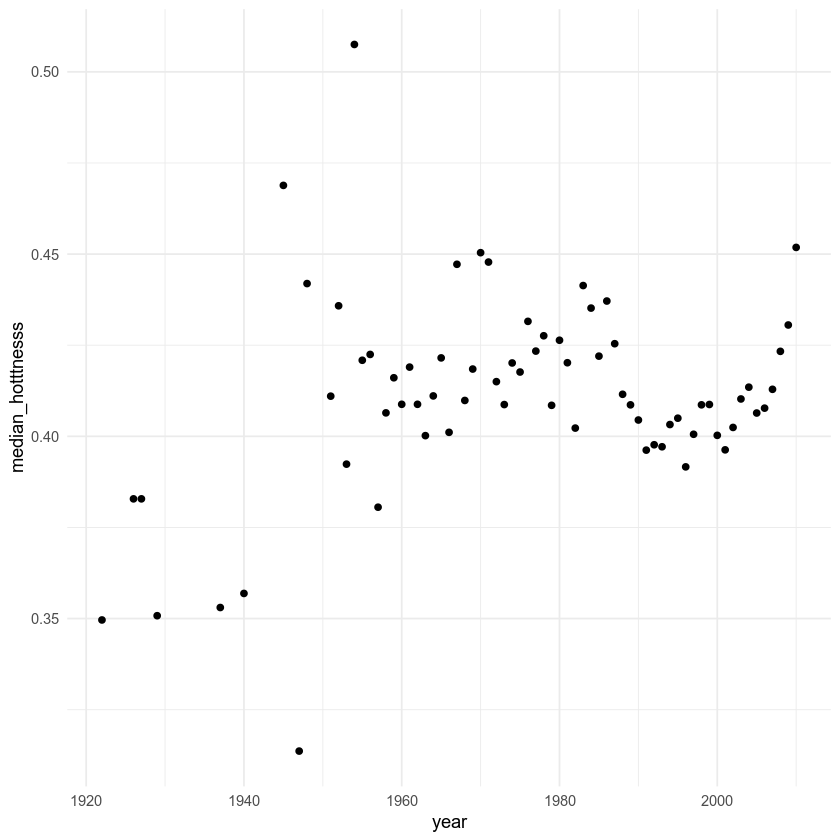

In [8]:
sl %>%
  group_by(year) %>%
  summarise(median_hotttnesss = median(artist_hotttnesss)) %>%
  ggplot(aes(x = year, y = median_hotttnesss)) +
  geom_point() + theme_minimal()

Without the grouping, we would have plotted many points for every year (one for each song in that year).

Arguably, it is easier to see a possible trend in the previous plot than in the following.

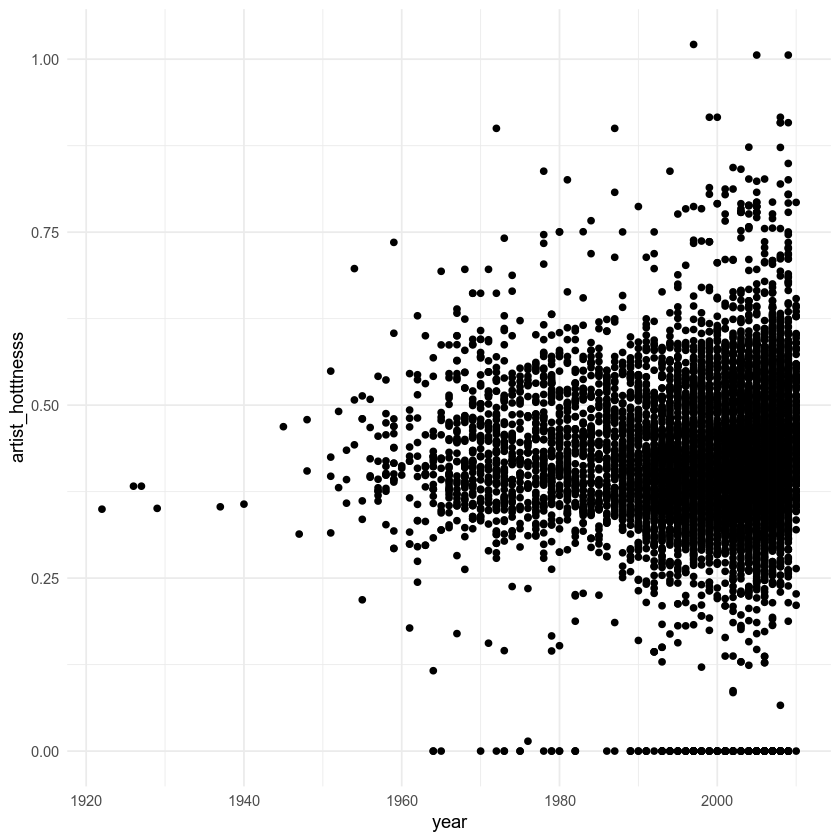

In [9]:
sl %>%
  ggplot(aes(x = year, y = artist_hotttnesss)) +
  geom_point() + theme_minimal()

## Your turn!

Compute the median song duration for each city and find the city with shortest and longest songs.  
You will need to use `group_by()`, yet you can modify the code we just used.

In [ ]:
# your code here.

## Challenge 1: your turn!

- Produce two new variables that are the rounding of latitude and longitude (you decide the rounding).  
- Group artists by the new rounded latitude and longitude. 
- Use `tally()` to count how many rows fall in each group
- Arrange by `n`umber of songs in each group

In [ ]:
# your code here.
# proposed solution (don't look at them yet!) at the end of the document.

# Wide, Long, Tidy, Groupy

Dataframes can have differen shape: some are longer, some are wider, some are messy, some are tidy.  

Consider for examples the two following dataframes.

The dataframes will contain information about the best band in certain decades for a certain musical style.  
The choice is mine ;-)

In [10]:
long_df <- tibble(
  Style = c("punk","punk","punk","metal","metal","metal"),
  Decade = c(1980,1990,2000,1980,1990,2000),
  Band = c("Ramones","Pennywise","Black Flag","Metallica","Sepultura","Gojira")
)
wide_df <- tibble(
  Style = c("punk","metal"),
  `1980` = c("Ramones","Metallica"),
  `1990` = c("Pennywise","Sepultura"),
  `2000` = c("Black Flag","Gojira")
)
long_df
wide_df

Style,Decade,Band
<chr>,<dbl>,<chr>
punk,1980,Ramones
punk,1990,Pennywise
punk,2000,Black Flag
metal,1980,Metallica
metal,1990,Sepultura
metal,2000,Gojira


Style,1980,1990,2000
<chr>,<chr>,<chr>,<chr>
punk,Ramones,Pennywise,Black Flag
metal,Metallica,Sepultura,Gojira


## Reflect:
Do the two dataframe contain the same information?
  
    
     
     
     
> your answer here

In fact, we can go from one shape to the other of that dataframe without loosing information.

To go from the long (many rows) to the wide (many columns) format we use `spread()`.

In [11]:
long_df %>%
  spread(key = Decade,
         value = Band)

Style,1980,1990,2000
<chr>,<chr>,<chr>,<chr>
metal,Metallica,Sepultura,Gojira
punk,Ramones,Pennywise,Black Flag


In [12]:
wide_df %>%
  gather(key = Decade,
         value = Band,
         -Style)

Style,Decade,Band
<chr>,<chr>,<chr>
punk,1980,Ramones
metal,1980,Metallica
punk,1990,Pennywise
metal,1990,Sepultura
punk,2000,Black Flag
metal,2000,Gojira


Yet, consider the following dataframe, where we added one metal band in the 1980s.

In [14]:
long_df_2 <- long_df %>%
 add_row(
   Style = "metal", Decade = 1980, Band = "Megadeth"
 )
long_df_2

Style,Decade,Band
<chr>,<dbl>,<chr>
punk,1980,Ramones
punk,1990,Pennywise
punk,2000,Black Flag
metal,1980,Metallica
metal,1990,Sepultura
metal,2000,Gojira
metal,1980,Megadeth


If we try to go back to the wide format:

In [13]:
long_df_2 %>%
  spread(key = Decade,
         value = Band)

ERROR: Error in eval(lhs, parent, parent): object 'long_df_2' not found


We get an error: in the wide format there was space only for 1 band in Metal, 1980.  
In the long format, we can have many.

Think about the `Style` and `Decade` as the "address" of a `band`.  
If every band has a unique "address", then we can go back and forth between long and wide formats.  

In the following example, we will remove part of the "address": we will not be able to spread anymore.

In [18]:
long_df %>%
  select(-Style) %>%
  spread(key = Decade,
         value = Band)

ERROR: Each row of output must be identified by a unique combination of keys.
Keys are shared for 6 rows:
* 1, 4
* 2, 5
* 3, 6
Do you need to create unique ID with tibble::rowid_to_column()?

## Messy data

Long and Wide are two position in a more complicated spectru, The following data is arguably more long than wide, but it could also be "longer".

In [19]:
long_df_rank_2 <- long_df_2 %>%
  mutate(Albums_in_Decade = c(7,5,1,4,4,4,3))
long_df_rank_2

long_df_rank <- long_df_rank_2 %>%
  filter(Band != "Megadeth")
long_df_rank

Style,Decade,Band,Albums_in_Decade
<chr>,<dbl>,<chr>,<dbl>
punk,1980,Ramones,7
punk,1990,Pennywise,5
punk,2000,Black Flag,1
metal,1980,Metallica,4
metal,1990,Sepultura,4
metal,2000,Gojira,4
metal,1980,Megadeth,3


Style,Decade,Band,Albums_in_Decade
<chr>,<dbl>,<chr>,<dbl>
punk,1980,Ramones,7
punk,1990,Pennywise,5
punk,2000,Black Flag,1
metal,1980,Metallica,4
metal,1990,Sepultura,4
metal,2000,Gojira,4


Once again, we can not simply go from this long format to the wide format.

In [20]:
long_df_rank %>%
  spread(key = Decade,
         value = Band)

Style,Albums_in_Decade,1980,1990,2000
<chr>,<dbl>,<chr>,<chr>,<chr>
metal,4,Metallica,Sepultura,Gojira
punk,1,NA,NA,Black Flag
punk,5,NA,Pennywise,NA
punk,7,Ramones,NA,NA


Nope, this is not at all what we wanted.  
The information is still there, but we also had to introduce a lot of `NA`s. Moreover, the format is not consistent (some rows have 1 band, 1 row has 4 bands, which happen to have the same number of albums...)

To express the same information, we would probably need to use two separate wide dataframes: one for the bands, one for the rankings.

In [17]:
long_df_rank %>%
  select(-Albums_in_Decade) %>%
  spread(key = Decade,
         value = Band)

ERROR: Error in eval(lhs, parent, parent): object 'long_df_rank' not found


In [16]:
long_df_rank %>%
  select(-Band) %>%
  spread(key = Decade,
         value = Albums_in_Decade)

ERROR: Error in eval(lhs, parent, parent): object 'long_df_rank' not found


Notice that in the above two cells, the roles of `Albums_in_Decade` and `Band` switch.  

Dealing with two tables (or dataframes) is more complicated: for one thing, we need to remind what *links* exist between the two tables (in this case: one expresses the name band, the other the associated ranking of that band). **Relational** databases have ways of making those links explicit, but simple tabular data (as dataframes) doesn't. Thus, we need to be more strict about how we represent data in dataframes.

There's another way data can be messy, and it is by being TOO long:

In [15]:
messy_df_rank <- data_frame(
  Style = rep(c("punk","punk","metal","metal"),3),
  Decade = c(rep(1980,4),rep(1990,4),rep(2000,4)),
  Information = rep(c("Band","Albums_in_Decade"),6),
  Value = c("Ramones",7,"Metallica",4,"Pennywise",5,"Sepultura",4,"Black Flag",1,"Gojira",4)
)
messy_df_rank

Warning message:
“`data_frame()` is deprecated, use `tibble()`.
This warning is displayed once per session.”

Style,Decade,Information,Value
<chr>,<dbl>,<chr>,<chr>
punk,1980,Band,Ramones
punk,1980,Albums_in_Decade,7
metal,1980,Band,Metallica
metal,1980,Albums_in_Decade,4
punk,1990,Band,Pennywise
punk,1990,Albums_in_Decade,5
metal,1990,Band,Sepultura
metal,1990,Albums_in_Decade,4
punk,2000,Band,Black Flag


A number of issue are at play in `messy_df_rank`: Most notably, the `typeof()` the `Value` is not uniform. R silently changed the numeric values into characters (and we can't do much math with that!). Moreover, let's consider the next one where we add one "row" (actually, two).

In [21]:
messy_df_rank_2 <- messy_df_rank %>%
 add_row(
   Style = "metal", Decade = 1980, Information = "Band", Value = "Megadeth"
 ) %>%
 add_row(
   Style = "metal", Decade = 1980, Information = "Albums_in_Decade", Value = 3
 )

messy_df_rank_2

Style,Decade,Information,Value
<chr>,<dbl>,<chr>,<chr>
punk,1980,Band,Ramones
punk,1980,Albums_in_Decade,7
metal,1980,Band,Metallica
metal,1980,Albums_in_Decade,4
punk,1990,Band,Pennywise
punk,1990,Albums_in_Decade,5
metal,1990,Band,Sepultura
metal,1990,Albums_in_Decade,4
punk,2000,Band,Black Flag


In `long_df_rank` and `long_df_rank_2`, we could always associate a band with its ranking even if the rows where shuffled around or arranged in any other way:

In [ ]:
long_df_rank_2 %>%
  sample_frac(1)

With a little bit more work, we could do that also for `messy_df_rank`. That is because there was only ONE band for each decade and style.

In [ ]:
messy_df_rank %>%
  sample_frac(1)

Yet, this is not possible anymore for `messy_df_rank_2`:

In [ ]:
messy_df_rank_2 %>%
  sample_frac(1)

We now have two different MyRanking values (a 7 and a 8), both referring to a 1980 metal observation. Who got the 7 and who the 8?

## Wrangling: Your Turn

Consider the following dataframe in long format from `singer`

In [22]:
songs

title,artist_name,year
<chr>,<chr>,<int>
Corduroy,Pearl Jam,1994
Grievance,Pearl Jam,2000
Stupidmop,Pearl Jam,1994
Present Tense,Pearl Jam,1996
MFC,Pearl Jam,1998
Lukin,Pearl Jam,1996
It's Lulu,The Boo Radleys,1995
Sparrow,The Boo Radleys,1992
Martin_ Doom! It's Seven O'Clock,The Boo Radleys,1995


Conver `songs` in a wide format and then back.

## Tidy data

The concept of Tidy Data tries to implements some constraints to prevent common errors.

> Tidy data is a standard way of mapping the meaning of a dataset to its structure. A dataset is messy or tidy depending on how rows, columns and tables are matched up with observations, variables and types. In tidy data:
>
>  -  Each variable forms [one, and only one] column.
>  -  Each observation forms a row.
>  -  Each type of observation (observational unit) forms a dataframe (table).

(from https://tidyr.tidyverse.org/articles/tidy-data.html#tidy-data <- Go and read that chapter!)

Thus, the first thing we need to decide in our example is: what is the observational unit.  
There's not only one possible answer, but we can provide at least one.

In [ ]:
wide_df

Every decade we observe, for two different styles, what was my favourite band and what was the my band ranking.  

Thus, we can identify the decade as the observational unit.

In that case, in the `wide_df` each of the two rows correspond to three different observations. And that's not tidy.

In [ ]:
long_df

The `long_df` is better. Yet, my taste is to have the variable identifying the main observational unit on the leftmost position.

In [ ]:
long_df <- long_df %>%
  select(Decade, Style, Band)
long_df

Notice that `long_df_rank` is still tidy: each row correspond to an observation, each column form on (and only one) column, and we have only one observational unit.

In [ ]:
long_df_rank

## Reflection

Consider the `singer_locations` dataframe. What is the observational unit in that case?

In [ ]:
library(singer)
library(skimr)
singer_locations %>%
  skim() %>% kable()

## Avoiding trouble

The five most common things that make data messy are:



 1.   Column headers are values, not variable names.

 2.   Multiple variables are stored in one column.

 3.   Variables are stored in both rows and columns.

 4.   Multiple types of observational units are stored in the same table.

 5.   A single observational unit is stored in multiple tables.

(from https://tidyr.tidyverse.org/articles/tidy-data.html#sec:tidying)

We saw an violation of `1` in `wide_df`: the years (1980, 1990, 2000) are values, not variable names. We solved it making the dataframe longer.

We saw a violation of `1` in `messy_df_rank` and `messy_df_rank_2`: two different variables were stored in the same column. `long_df_rank` and `long_df_rank_2` contain the same information of their messy counterpart but avoid this mistake.

### Challenge reflection

Is singer locations tidy or not? If not, what can you do to make it tidyer?

# Join together!

As we have seen, a tidy dataframe can not contain all the information we need about our problem.  

No worries! We can join two or more dataframes together!

In the lab we'll only see a little bit of this, in the next lecture Thomas will go in details.

Let's go back to one of the tiny examples we saw in lecture 2. The one with John playing the Guitar.

In [ ]:
"instruments"
band_instruments
"members"
band_members

We want to know who plays the bass in the Beatles.  
We can do it in two different ways:  

1) we first look at `band_members`, find who plays in the Beatles, remember those names; then, with those names in mind we look at the `band_instruments` and see what those musicians play.  
2) we first look at `band_instruments`, find who plays the bass, remember those names; then, with those names in mind we look at the `band_members` and see in which band those musicians play.

In this particular case the second one is easier (why?). But, the important thing is that one column allows us to bridge one table with the other.

There are many ways of doing this in R. Now we see one based on `join`ing (_glueing_) the tables together.  
Observe what `left_join` does:

In [ ]:
band_members %>%
 left_join(band_instruments, by = "name")

This is not exactly what we did in 1), but almost. For any of the name in `band_members` we went to the instruments table and look up what they play. One of the band members name is not in the instruments table, so we indicate with `NA` that we don't have that information. Compare it with `right_join()`, where we first look at the band_instruments table (the dataframe which is written on the right of the join function) and then go back to the members table.

In [ ]:
band_members %>%
 full_join(band_instruments, by = "name")

## Reflection

Can you replicate the functioning of `right_join()` with a `left_join()` changing something else?

> your answer here.

There are many other "versions" of `_join()`: you can find theme here: https://dplyr.tidyverse.org/reference/join.html

Take a look and try them on band_members and instruments.

## Challenge 2: your turn!

Consider the two following dataframes from `singer`.

In [ ]:
locations %>%
  glimpse()
songs %>%
  glimpse()

They have some variable in common (which ones?) and some not in common (which ones?). Use `anti_join()` to find which songs are not present in the `locations` dataframe.

In [ ]:
# your code here

Now use one of the join operator and a `top_n()` to find the release with the oldest song.

In [ ]:
# your code here

#### WARNING

If you keep scrolling, you'll find solutions (one example of solutions) for challenges 1 and 2. Try FIRST to solve them by your own, and only after scroll down!

- .
- .
- .
- .
- .
- .
- .
- .
- .
- .
- .
- .
- .
- .
- .
- .
- .
- .
- .
- .
- .
- .
- .
- .
- .
- .
- .
- .
- .
- .
- .
- .
- .
- .
- .
- .
- .
- .
- .
- .
- .
- .
- .
- .
- .
- .
- .
- .
- .
- .
- .
- .
- .
- .
- .
- .
- .
- .
- .
- .
- .
- .
- .
- .
- .
- .
- .
- .
- .
- .
- .
- .
- .
- .
- .
- .
- .
- .
- .
- .
- .
- .
- .
- .
- .
- .
- .
- .
- .
- .
- .
- .
- .
- .
- .
- .
- .
- .
- .
- .
- .
- .
- .
- .
- .
- .
- .
- .
- .
- .
- .
- .
- .
- .
- .
- .
- .
- .
- .
- .
- .
- .
- .
- .
- .
- .
- .
- .
- .
- .
- .
- .
- .
- .
- .
- .
- .
- .
- .
- .
- .
- .
- .
- .

## Solution to Challenge 1

In [ ]:
singer_locations %>% 
  mutate(lat = latitude %>% round(digits = 0), # round latitude
         long = longitude %>% round(digits = 0)) %>% # round longitude
  group_by(lat,long) %>% # group by lat and long
  filter(!is.na(lat), !is.na(long)) %>% # filter out cities with no information about lat and long
  tally() %>% # tally up
  arrange(desc(n)) # arrange

## Solution to Challenge 2

In [ ]:
songs %>%
  anti_join(locations, # with anti_join we preserve only those rows wich values ARE NOT present in both datasets
            by = c("title","artist_name")) # we use 2 variables (title and artist_name) to ensure to capture unique combinations

In [ ]:
locations %>%
  inner_join(songs, # with inner_join we preserve only those rows wich values ARE present in both datasets
             by=c("title","artist_name")) %>% # we use 2 variables (title and artist_name) to ensure to capture unique combinations
  top_n(1,desc(year)) # we need to specify "desc()" to be sure not to get the most recent release